In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [131]:
train = pd.read_csv('Downloads/digit-recognizer/train.csv')
test = pd.read_csv('Downloads/digit-recognizer/test.csv')

In [85]:
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [90]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [91]:
digit.shape

(42000, 785)

In [92]:
digit.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [93]:
digit.drop(['label'],axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
digit['label']

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [95]:
digit['label'].shape

(42000,)

In [96]:
# x=digit.drop(['label'],axis=1)
# y=digit['label']

# x_train,y_train=x[0:130],y[0:130]
# y_test,y_test=x[130:],y[130:]

In [97]:
# X_train,X_test,y_train,y_test=train_test_split(x,y,
#                                                train_size=2000,
#                                                test_size=2000,
#                                               stratify=y,
#                                               random_state=42)

In [98]:
x=digit.drop(['label'],axis=1)
y=digit['label']

In [99]:
x=digit.drop(['label'],axis=1)

In [100]:
y=digit['label']

In [101]:
y_cat=to_categorical(y)

In [102]:
y_cat.shape

(42000, 10)

In [103]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [104]:
model = Sequential()

model.add(Dense(256,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))



In [105]:
# print("input shape ",model.input_shape)
# print("output shape ",model.output_shape)

In [106]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [107]:
model.fit(x,y_cat,validation_split=0.3,shuffle=True,epochs=1000,callbacks=[EarlyStopping(patience=10)])

Train on 29399 samples, validate on 12601 samples
Epoch 1/1000
29399/29399 [==============================] - 7s 238us/step - loss: 10.4611 - acc: 0.3502 - val_loss: 10.6173 - val_acc: 0.3403
Epoch 2/1000
29399/29399 [==============================] - 6s 211us/step - loss: 10.0293 - acc: 0.3773 - val_loss: 9.8224 - val_acc: 0.3904
Epoch 3/1000
29399/29399 [==============================] - 6s 211us/step - loss: 9.9746 - acc: 0.3810 - val_loss: 10.6080 - val_acc: 0.3415
Epoch 4/1000
29399/29399 [==============================] - 6s 217us/step - loss: 9.9597 - acc: 0.3818 - val_loss: 9.9268 - val_acc: 0.3841
Epoch 5/1000
29399/29399 [==============================] - 6s 210us/step - loss: 9.9511 - acc: 0.3825 - val_loss: 9.9120 - val_acc: 0.3847
Epoch 6/1000
29399/29399 [==============================] - 6s 204us/step - loss: 9.9272 - acc: 0.3840 - val_loss: 9.8931 - val_acc: 0.3861
Epoch 7/1000
29399/29399 [==============================] - 6s 207us/step - loss: 9.1542 - acc: 0.4319 - v

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#########  Digit Recognizer

In [132]:
Y_train = train["label"]

In [133]:
X_train = train.drop(labels = ["label"],axis = 1) 

In [134]:
del train

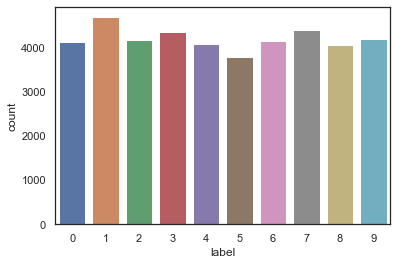

In [135]:
g = sns.countplot(Y_train)

In [136]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [137]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [138]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [139]:
X_train = X_train / 255.0

In [140]:
test = test / 255.0

In [141]:
X_train = X_train.values.reshape(-1,28,28,1)

In [142]:
test = test.values.reshape(-1,28,28,1)

In [143]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [144]:
random_seed = 2

In [145]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

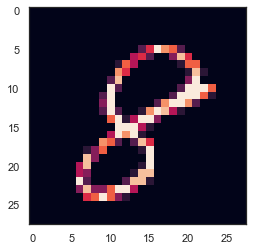

In [146]:
g = plt.imshow(X_train[0][:,:,0])

In [147]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [148]:
optimizer =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [149]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [150]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [151]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [152]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/1
 - 175s - loss: 0.2510 - acc: 0.9183 - val_loss: 0.0843 - val_acc: 0.9757


In [153]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


datagen.fit(X_train)

In [154]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
 - 175s - loss: 0.1870 - acc: 0.9433 - val_loss: 0.0532 - val_acc: 0.9843


In [157]:
# predict results
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [158]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("digit788.csv",index=False)